In [1]:
#Mount my google drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


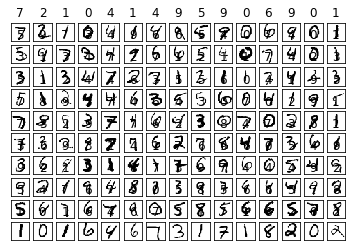

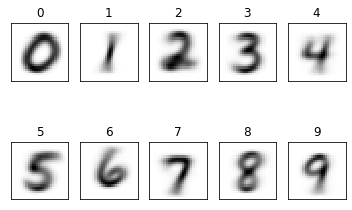

In [2]:
import matplotlib.pyplot as plt
import numpy as np


file_data   = "drive/My Drive/machine_learning_data/assignment08/mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


In [0]:
# Devide image Matrix into xMatrix and testMatrix
xMatrix = list_image[:, :6000]
xTestMatrix = list_image[:,6000: ]

label = list_label[:6000]
testLabel = list_label[6000:]

m = 6000

In [4]:
# One Hot encoding Y
labelCheck = label
nb_classes = 10
targets = label.reshape(-1)
label = np.eye(nb_classes)[targets]

# One Hot encoding Y test
testLabelCheck = testLabel
nb_classes = 10
testTargets = testLabel.reshape(-1)
testLabel = np.eye(nb_classes)[testTargets]
testLabel.shape

(4000, 10)

In [0]:
# Initialize uMatrix, vMatrix, wMatrix
def createRandomMatrix(m, n):
  result = []
  for i in range(m):
    temp = []
    for j in range(n):
      temp.append(np.random.normal())
    result.append(temp)
  return np.array(result, dtype='float64')

uMatrix = createRandomMatrix(196, 784)
vMatrix = createRandomMatrix(49, 196)
wMatrix = createRandomMatrix(10, 49)

biasU = createRandomMatrix(196, 1)
biasV = createRandomMatrix(49, 1)
biasW = createRandomMatrix(10, 1)

loss = 0
lossTest = 0

# Initialize y, z, h matrix
def create0Matrix(m, n):
  result = []
  for i in range(m):
    temp = []
    for j in range(n):
      temp.append(0)
    result.append(temp)
  return np.array(result, dtype='float64')

yMatrix = create0Matrix(196, 6000)
ySigmoidMatrix = create0Matrix(196, 6000)

yTestMatrix = create0Matrix(196, 4000)
yTestSigmoidMatrix = create0Matrix(196, 4000)

zMatrix = create0Matrix(49, 6000)
zSigmoidMatrix = create0Matrix(49, 6000)

zTestMatrix = create0Matrix(49, 4000)
zTestSigmoidMatrix = create0Matrix(49, 4000)

hMatrix = create0Matrix(10, 6000)
hSigmoidMatrix = create0Matrix(10, 6000)

hTestMatrix = create0Matrix(10, 4000)
hTestSigmoidMatrix = create0Matrix(10, 4000)

In [0]:
# Functions 
def sigmaFunc(inputMatrix):
  return np.array(1 / (1 + np.exp(-1 * inputMatrix)),dtype='float64')

def lossFunc(inputMatrix):
  return 1/m * np.sum( ((-1 * label.T) * np.log(inputMatrix)) - ((1-label.T) * np.log(1-inputMatrix)))

def lossTestFunc(inputMatrix):
  return 1/m * np.sum( ((-1 * testLabel.T) * np.log(inputMatrix)) - ((1-testLabel.T) * np.log(1-inputMatrix)))

def derivateH():
  return (1 / m) * (hSigmoidMatrix - label.T)

def derivateV():
  return np.matmul(wMatrix.T, derivateH()) * zSigmoidMatrix * (1 - zSigmoidMatrix)

def derivateU():
  return np.matmul(vMatrix.T, derivateV()) * ySigmoidMatrix * (1 - ySigmoidMatrix)

In [0]:
# Learning Function
def forwardPropogation():
  global yMatrix, ySigmoidMatrix, zMatrix, zSigmoidMatrix, hMatrix, hSigmoidMatrix, loss
  global yTestMatrix, yTestSigmoidMatrix, zTestMatrix, zTestSigmoidMatrix, hTestMatrix, hTestSigmoidMatrix, lossTest
  
  yMatrix = np.matmul(uMatrix, xMatrix)
  yMatrix = yMatrix + biasU
  ySigmoidMatrix = sigmaFunc(yMatrix)

  zMatrix = np.matmul(vMatrix, ySigmoidMatrix)
  zMatrix = zMatrix + biasV
  zSigmoidMatrix = sigmaFunc(zMatrix)

  hMatrix = np.matmul(wMatrix, zSigmoidMatrix)
  hMatrix = hMatrix + biasW
  hSigmoidMatrix = sigmaFunc(hMatrix)
  loss = lossFunc(hSigmoidMatrix)

  yTestMatrix = np.matmul(uMatrix, xTestMatrix)
  yTestMatrix = yTestMatrix + biasU
  yTestSigmoidMatrix = sigmaFunc(yTestMatrix)

  zTestMatrix = np.matmul(vMatrix, yTestSigmoidMatrix)
  zTestMatrix = zTestMatrix + biasV
  zTestSigmoidMatrix = sigmaFunc(zTestMatrix)

  hTestMatrix = np.matmul(wMatrix, zTestSigmoidMatrix)
  hTestMatrix = hTestMatrix + biasW
  hTestSigmoidMatrix = sigmaFunc(hTestMatrix)
  lossTest = lossTestFunc(hTestSigmoidMatrix)



learningRate = 0.7

def backPropogation():
  global uMatrix, biasU, vMatrix, biasV, wMatrix, biasW
  wMatrix = wMatrix - learningRate * np.matmul(derivateH(), zSigmoidMatrix.T)
  biasW = biasW - (learningRate * np.sum(derivateH(), axis = 1).reshape(-1, 1))

  vMatrix = vMatrix - learningRate * np.matmul(derivateV(), ySigmoidMatrix.T)
  biasV = biasV - (learningRate * np.sum(derivateV(), axis = 1).reshape(-1, 1))

  uMatrix = uMatrix - learningRate * np.matmul(derivateU(), xMatrix.T)
  biasU = biasU - (learningRate * np.sum(derivateU(), axis = 1).reshape(-1, 1))


def learning():
  forwardPropogation()
  backPropogation()


In [8]:
learning()
print(np.sum(yTestMatrix))

-399158.7755562084


In [0]:
# Learning
epoch = 5000

lossList = []
lossTestList = []

accuracyList = []
testAccuracyList = []

for i in range(epoch):
  learning()

  # Append Loss
  lossList.append(loss)
  lossTestList.append(lossTest)

  # Calculate Accuracy
  accuracy = (np.argmax(hSigmoidMatrix, axis = 0) == labelCheck)
  accuracyRate = np.sum(accuracy) / len(labelCheck) * 100
  accuracyList.append(accuracyRate)

  testAccuracy = (np.argmax(hTestSigmoidMatrix, axis = 0) == testLabelCheck)
  testAccuracyRate = np.sum(testAccuracy) / len(testLabelCheck) * 100
  testAccuracyList.append(testAccuracyRate)

  

  if(i%10 == 0):
    print("loss : " + str(loss))
    print("test loss : " + str(lossTest))

    print("Accuracy : " + str(accuracyRate))
    print("test Accuracy : " + str(testAccuracyRate))

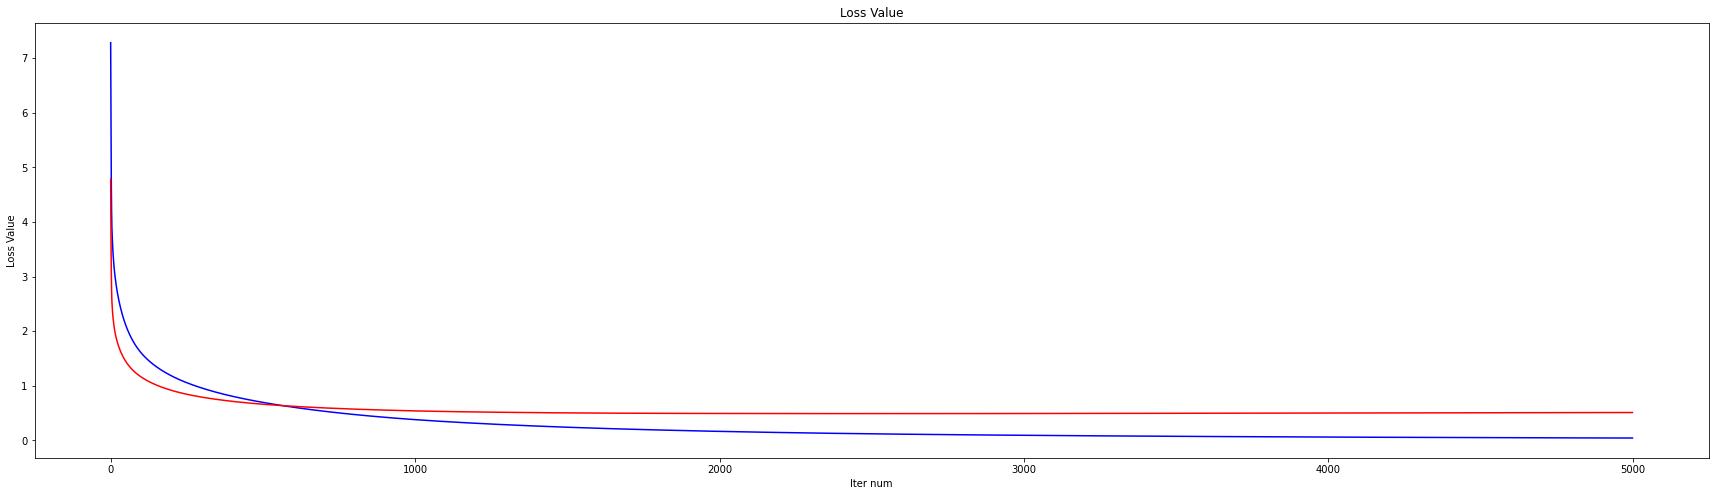

In [10]:
# Visualize of Loss Value
plt.figure(figsize=(30, 8))
plt.plot(range(len(lossList)), lossList, c='b')
plt.plot(range(len(lossTestList)), lossTestList, c='r')

plt.title('Loss Value')
plt.xlabel('Iter num')
plt.ylabel('Loss Value')
plt.show()

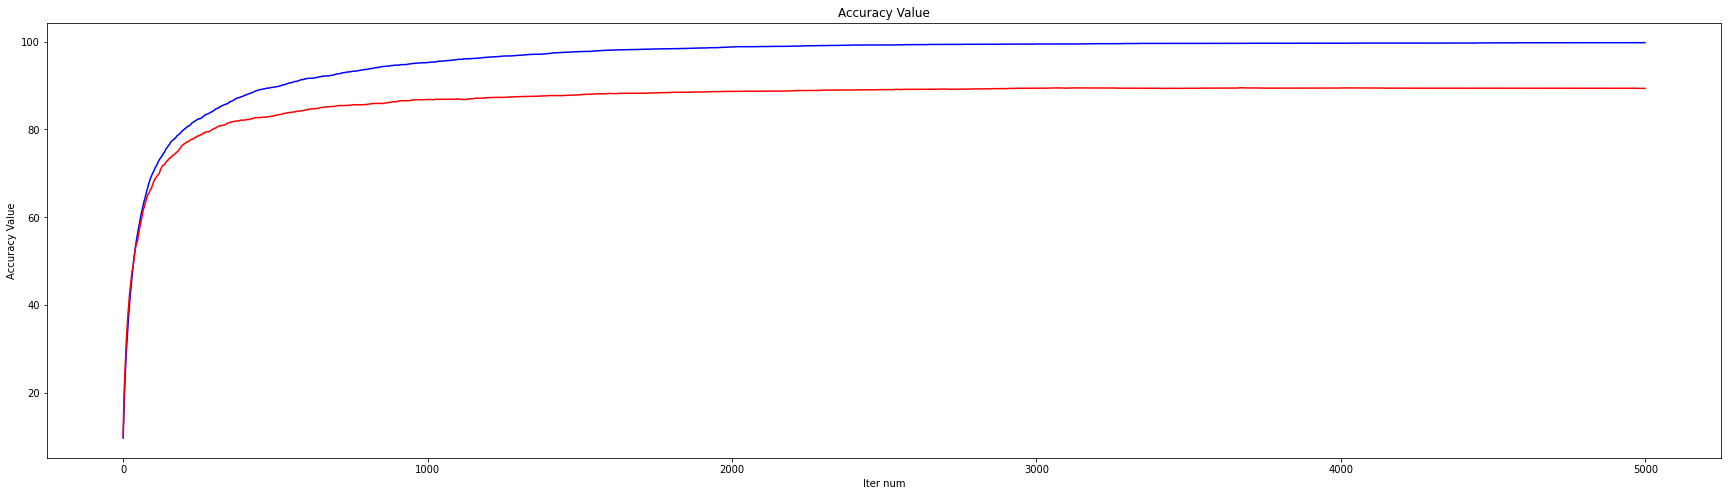

In [11]:
# Visualize of Accuracy
plt.figure(figsize=(30, 8))
plt.plot(range(len(accuracyList)), accuracyList, c='b')
plt.plot(range(len(testAccuracyList)), testAccuracyList, c='r')

plt.title('Accuracy Value')
plt.xlabel('Iter num')
plt.ylabel('Accuracy Value')
plt.show()

In [12]:
# Print the Final Accuracy
print("Training Data Accuracy : " + str(accuracyList[-1]))
print("Test Data Accuracy : " + str(testAccuracyList[-1]))

Training Data Accuracy : 99.75
Test Data Accuracy : 89.35


In [0]:
# Calculate the Correct Index and Non Correct Index for plotting
correctTestIndex = []

for i in range(10):
   for j in range(len(testAccuracy)):
    if (testAccuracy[j] == True) and (testLabelCheck[j] == i):
      correctTestIndex.append(j)
      break

nonCorrectTestIndex = []

for i in range(10):
  for j in range(len(testAccuracy)):
    if (testAccuracy[j] == False) and (testLabelCheck[j] == i):
      nonCorrectTestIndex.append(j)
      break

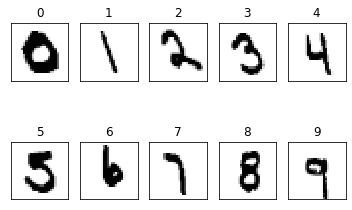

In [14]:
# Correct Predict Value
for i in range(10):
  
  plt.subplot(2, 5, i+1)
  tempLabel       = list_label[correctTestIndex[i]+6000]

  plt.title(tempLabel)

  tempVector   = list_image[:, correctTestIndex[i]+6000]
  tempMatrix   = tempVector.reshape((size_row, size_col))
  plt.imshow(tempMatrix, cmap='Greys', interpolation='None')


  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plt.show()

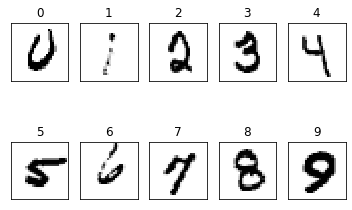

In [15]:
# Incorrect Predict Value
for i in range(10):
  
  plt.subplot(2, 5, i+1)
  tempLabel       = list_label[nonCorrectTestIndex[i]+6000]

  plt.title(tempLabel)

  tempVector   = list_image[:, nonCorrectTestIndex[i]+6000]
  tempMatrix   = tempVector.reshape((size_row, size_col))
  plt.imshow(tempMatrix, cmap='Greys', interpolation='None')


  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plt.show()